## 이 커널에서 주목해야할 점

1) 나이의 null값을 단순 평균으로 지정한것이 아닌 이름에 mr. ms. 들어간것으로 어느정도 예측을 함

이때 사용된 코드좀 분석해보기

2) pandas crosstab에서 data.SibSp를 왜 중괄호로 묶은거지??

3) SibSp vs Survived 그래프 왜 안나오지?


**Contents of the notebook:**

**Part1: Exploratory Data Analysis(EDA):**
1) Analysis of the features

2) Finding any relations or trends considering multiple features.

**Part2: Feature Engineering and Data Cleaning**
1) Adding any few features

2) Removing redundant features

3) Converting features into suitable form for modeling

**Part3: Predictive Modeling**
1) Running Basic Algorithms

2) Cross Validation

3) Ensembling

4) Important Features Extraction

**Part 1 : Exploratory Data Analysis(EDA)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age와 Cabin 그리고 Embarked에서 null값이 존재함으로 이를 수정을 해야한다.

**How many Survived??**

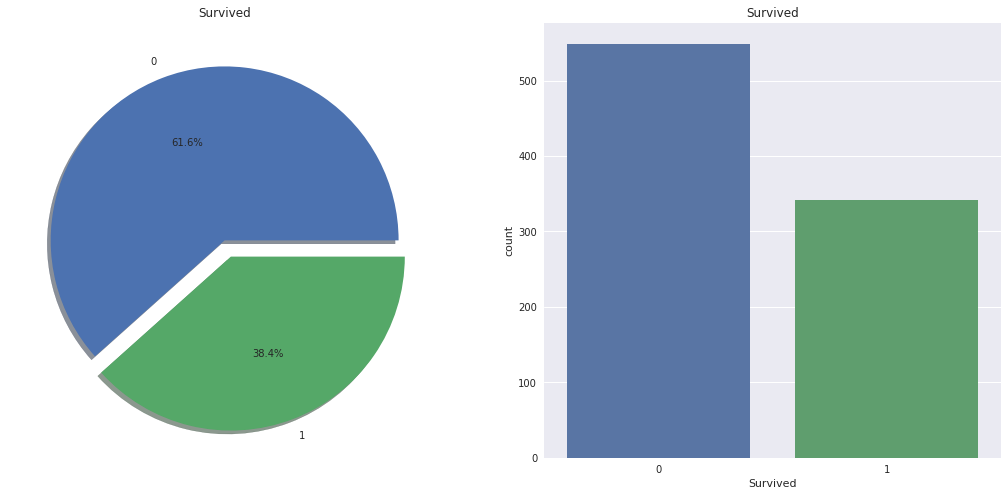

In [4]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

38.4 퍼센트의 인원만 살아남은것을 확인할 수 있다.

총 891명의 인원중 거의 350명이 살아남았다.

우리는 좀더 데이터에 대한 확실한 시야를 가질수 있도록 데이터를 좀더 자세히 확인해볼 필요가있다.

서로 다른 feature들 사이에 survived의 비율을 확인할 필요가 있다.

**Types Of Features**

**Categorical Features:**

A categorical variable is one that has two or more categories and each value in that feature can ve categorised by them. For example, gender is a categorical variable having cwo categories(male, female). Now we cannot sort or give any ordering to such variables. They are alse known as Nominal Variables.

즉 우리는 여기에 다른 변수를 마음대로 추가할수 없다.

**Categorical Features in the dataset: Sex,Embarked**

**Continuos Feature:**

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

즉 이 데이터에는 min, max 평균 등 수학적 통계값들을 사용할 수 있다.

**Continous Features in the dataset: Age**


## Analysing The Features


## Sex--> Categorical Feature

In [5]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

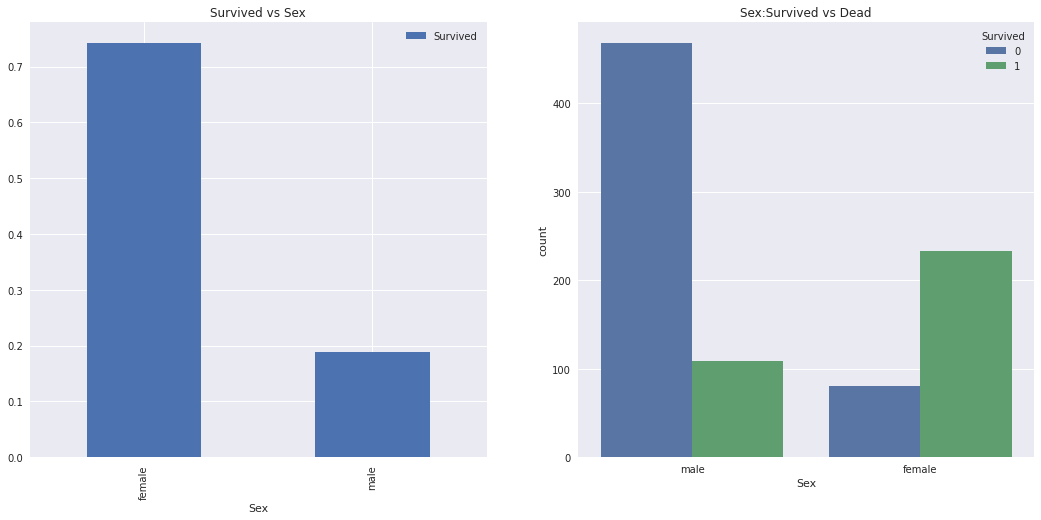

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Expand

This looks interesting. The number of men on the hisp is lot more than th number of women. Still the number of wemen, saved is almost twice th number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

## Pclass --> Ordinal Feature

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


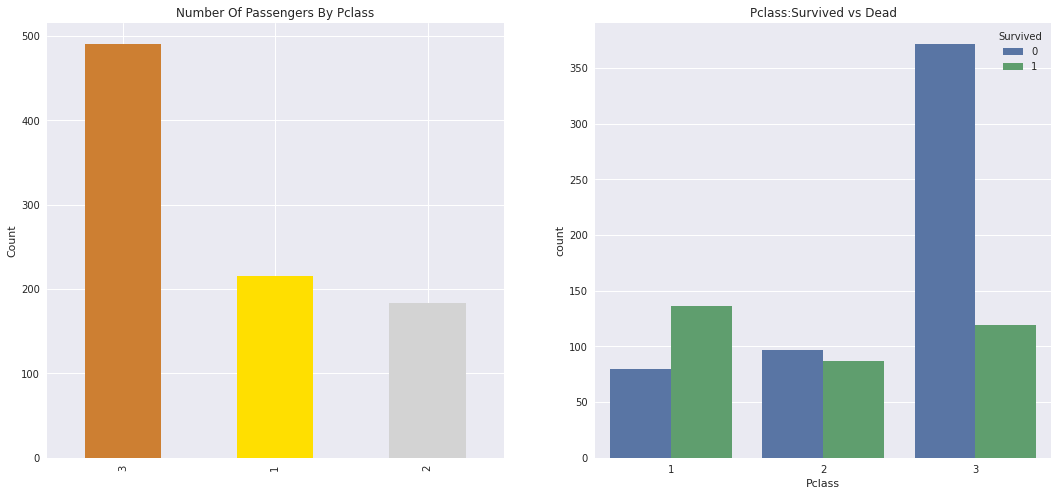

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

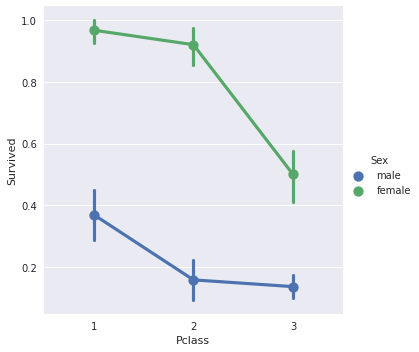

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data= data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died. 

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

## Age --> Continous Feature

In [11]:
print('Oldest Passenger was of :',data['Age'].max(),'Years')
print('Youngest Passenger was of :',data['Age'].min(),'Years')
print('Average Age on the ship :',data['Age'].mean(),'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


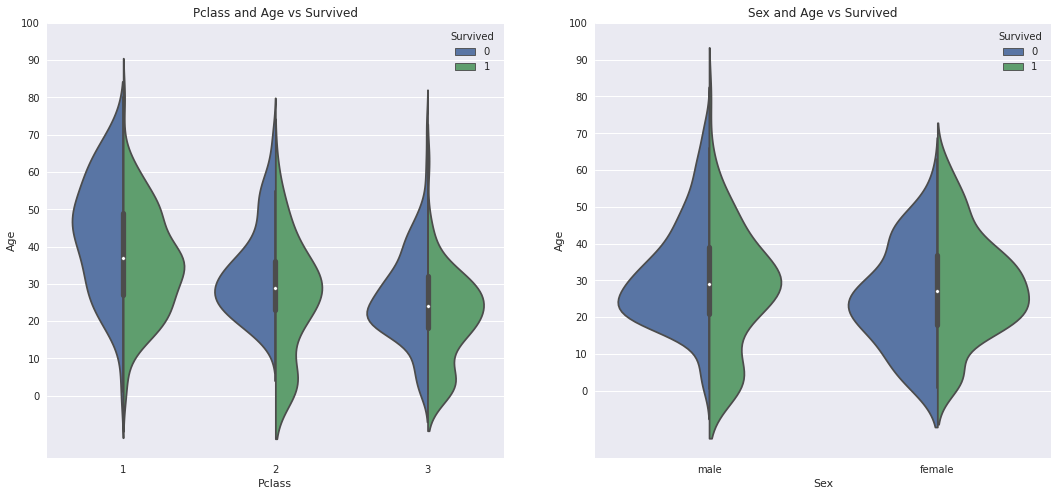

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!**, we can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**''What's In A Name??''**---> **Feature**  :p

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')#lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+)\.**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [17]:
## Assigning the NaN Values with the Ceil values of the mean ages

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any() #So no null values left finally 

False

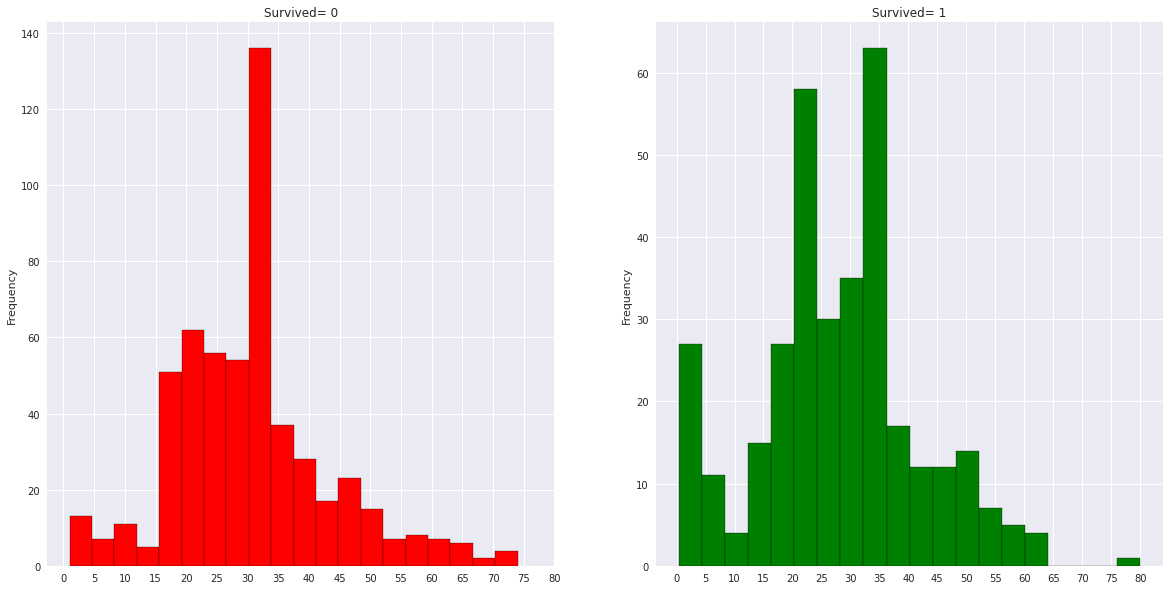

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
ax[0].set_xticks(list(range(0,85,5)))
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

### Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

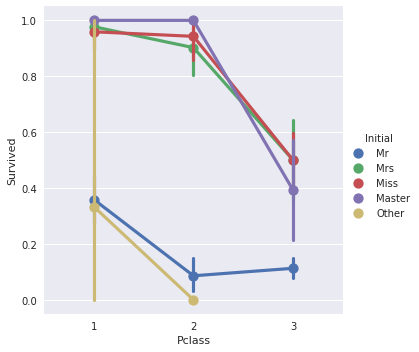

In [20]:
sns.factorplot('Pclass','Survived',hue='Initial',data=data)
plt.show()

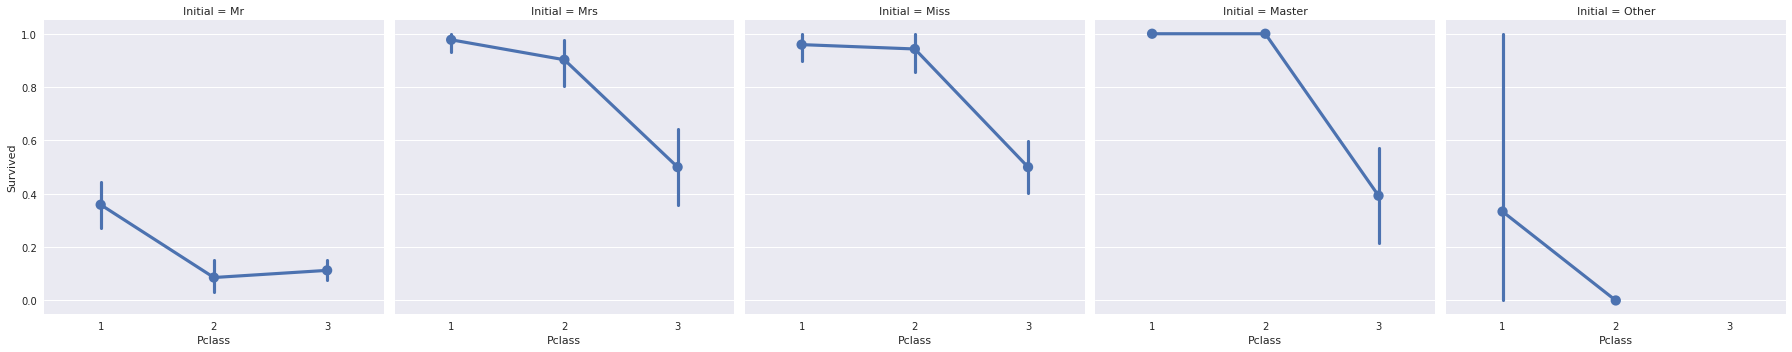

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class

## Embarked --> Categorical Value

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=False).style.background_gradient(cmap='summer_r')

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

## Chances for Survival by Port Of Embarkation

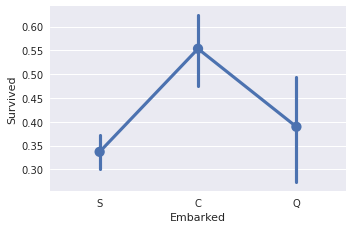

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest aroun 0.55 while it is lowest for S.

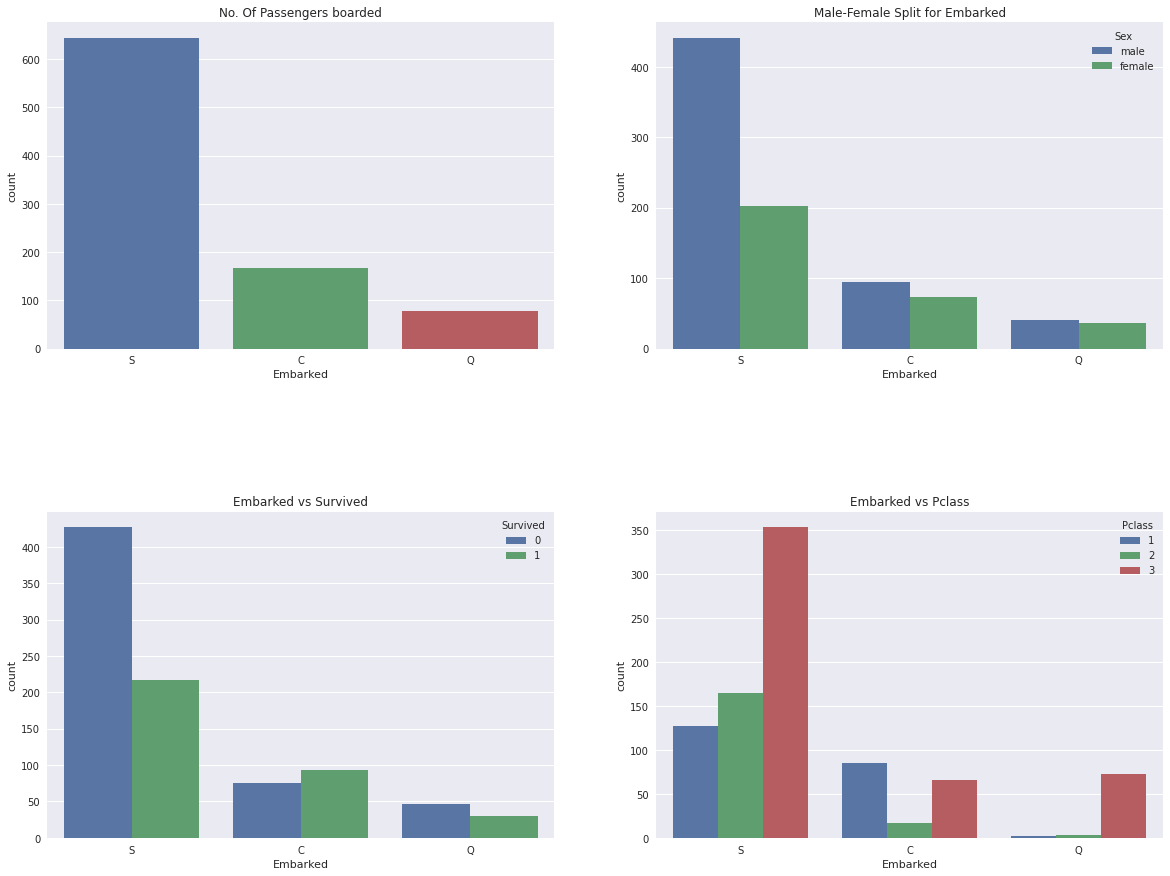

In [25]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title("No. Of Passengers boarded")
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title("Male-Female Split for Embarked")
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title("Embarked vs Survived")
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

#### Observations:

1) Maximum passengers boarded from S. Majority of tehm being from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived.The reason for this maybe the rescue of all the Pclass1 ans Pclass2 Passengers

3) The Embark S looks to the port form where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass3

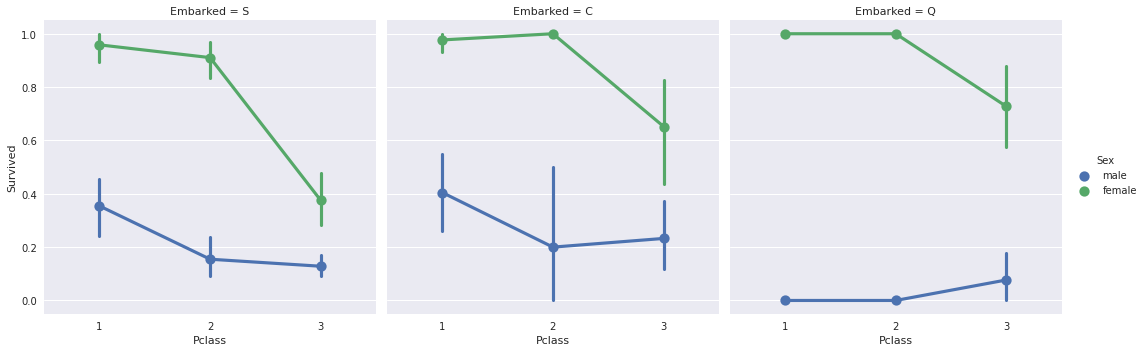

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

#### Observations:

1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

#### Filling Embarked NaN

In [27]:
data['Embarked'].fillna('S',inplace=True)

data.Embarked.isnull().any()

False

## SibSip -->Discrete Feature

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


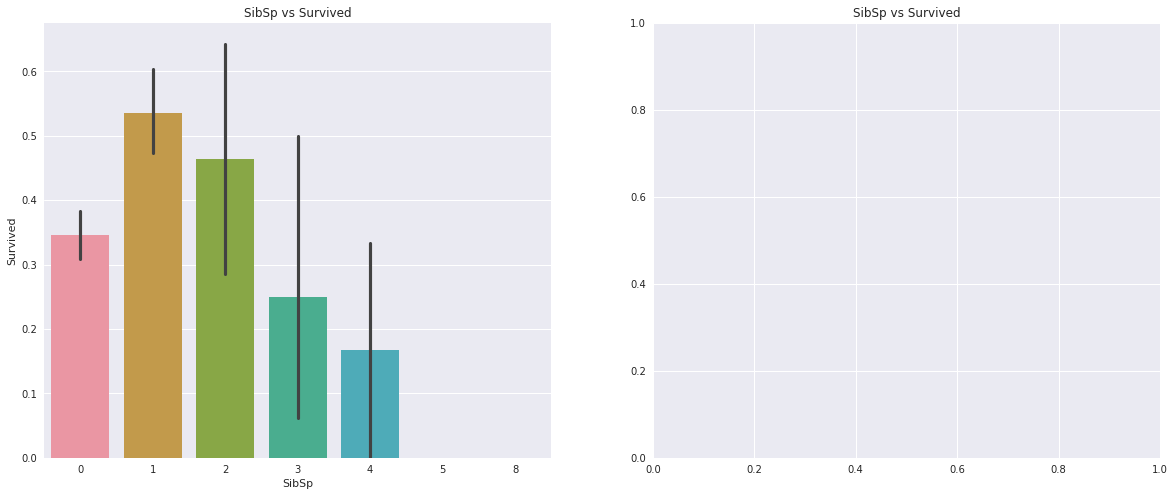

In [29]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations:

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## Parch

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


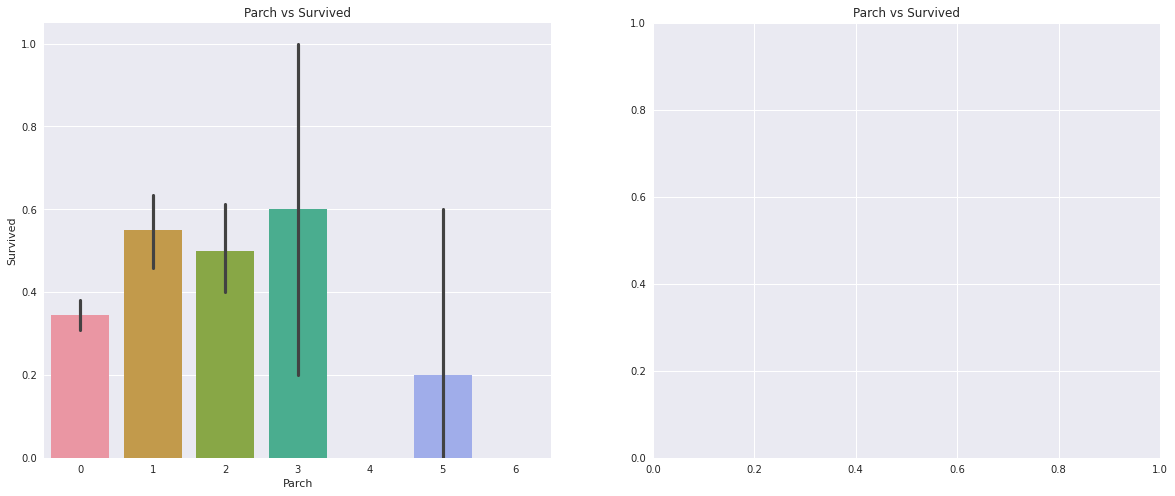

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Observations:

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

## Fare --> Continous Feature

In [33]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())


Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


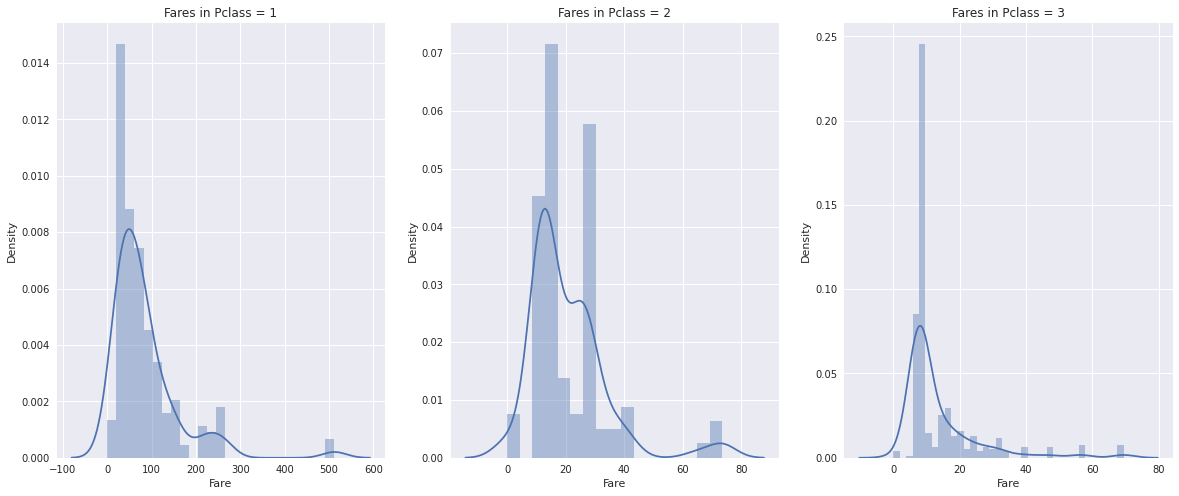

In [34]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass = 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass = 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass = 3')
plt.show()


There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

#### Observations in a Nutshell for all features:
**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

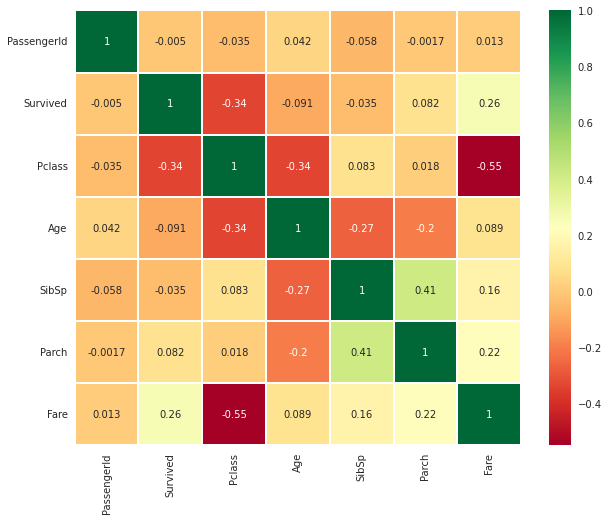

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.